<a href="https://colab.research.google.com/github/Maspie/Ranking-Clustering-Enhancing-Experience-of-Micro-Blogging-Sites/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd

In [ ]:
# !pip install kaggle --upgrade

In [ ]:
# !bash -c 'echo "{\"username\":\"fantasygeek\",\"key\":\"17eb608c7a5d1fa8db61de213b0b85e1\"}" > /root/.kaggle/kaggle.json'

In [ ]:
# !kaggle --version

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import os

# # Create a kaggle folder
# os.makedirs('/root/.kaggle/', exist_ok=True)

# # Move the kaggle.json file into the folder
# os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# # Change the permissions of the file
# os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json
# !ls -lha /root/.kaggle/


In [ ]:
# !kaggle competitions download -c nlp-getting-started

In [ ]:
# !unzip nlp-getting-started.zip

In [ ]:
# !ls


In [ ]:
# data = pd.read_csv("train.csv")


In [ ]:
# data['text'].head()

# Importing NLP toolkit

In [ ]:

# import re
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# import nltk

# # Download necessary NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

# # Instantiate the lemmatizer
# lemmatizer = WordNetLemmatizer()

In [ ]:
# !pip install emot


# Preprocessing Tweets

In [ ]:
# from emot.emo_unicode import UNICODE_EMOJI # For emojis
# from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
# # Function to convert emoticons and emojis to words
# def convert_emoticons_emojis(text):

#     for emot in EMOTICONS_EMO:
#         escaped_emot = re.escape(emot)
#         text = re.sub(u'(' + escaped_emot + ')', "_".join(EMOTICONS_EMO[emot].replace(",", "").split()), text)
#     # Replace emojis
#     for emo in UNICODE_EMOJI:
#         text = text.replace(emo, "_".join(UNICODE_EMOJI[emo].replace(",", "").replace(":", "").split()))
#     return text

# def preprocess_text(text):
#     # Lowercase
#     text = text.lower()
#     # Convert emoticons and emojis to words
#     text = convert_emoticons_emojis(text)
#     # Remove URLs
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
#     # Remove user @ references and # from tweet
#     text = re.sub(r'\@\w+|\#','', text)
#     # Remove all remaining punctuations
#     text = re.sub(r'[^\w\s]', '', text)
#     # Remove numbers
#     text = re.sub(r'\d+', '', text)
#     # Tokenize
#     tokens = word_tokenize(text)
#     # Remove stopwords
#     tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
#     # Lemmatize the tokens
#     tokens = [lemmatizer.lemmatize(word) for word in tokens]

#     return " ".join(tokens)

In [ ]:
# data['clean_text'] = data['text'].apply(preprocess_text)
# data = data.drop_duplicates(subset='clean_text')


In [ ]:
# data['clean_text'].head()

In [ ]:
# columns = list(data.columns)


In [ ]:
# data.head()

# Importing saved Embedddings of tweets and saved twitter dataset with cleaned tweets

In [ ]:
import numpy as np
import requests
import pandas as pd
npy_url = 'https://drive.google.com/uc?id=1AeAVk_UX9drv3yt2ooGOq5ODed2YlQgZ&export=download'
csv_url = 'https://drive.google.com/uc?id=1yh9s5SJ5SgEdoVbA_6OjCOFwUs5AQySX&export=download'

# Function to download a file from Google Drive
def download_file_from_google_drive(url, local_dest):
    response = requests.get(url)
    with open(local_dest, 'wb') as file:
        file.write(response.content)

npy_local_path = 'temp_file.npy'
download_file_from_google_drive(npy_url, npy_local_path)

# Load the .npy file
loaded_embeddings = np.load(npy_local_path)

# Load the .csv file
data = pd.read_csv(csv_url)
subset_data = data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

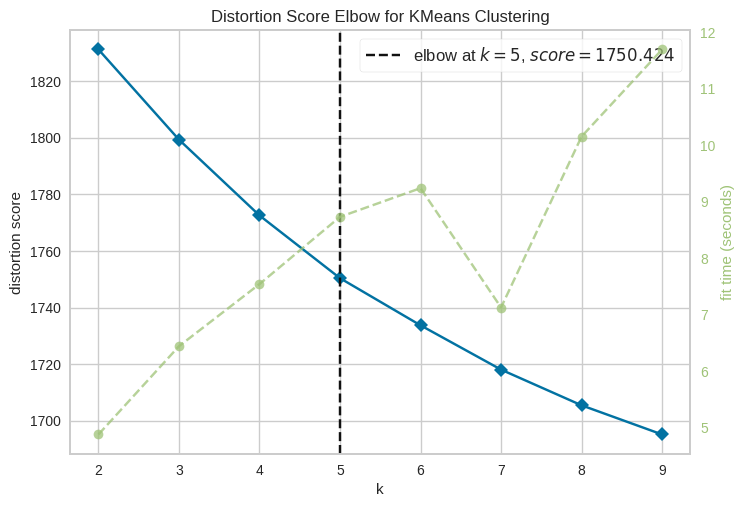

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


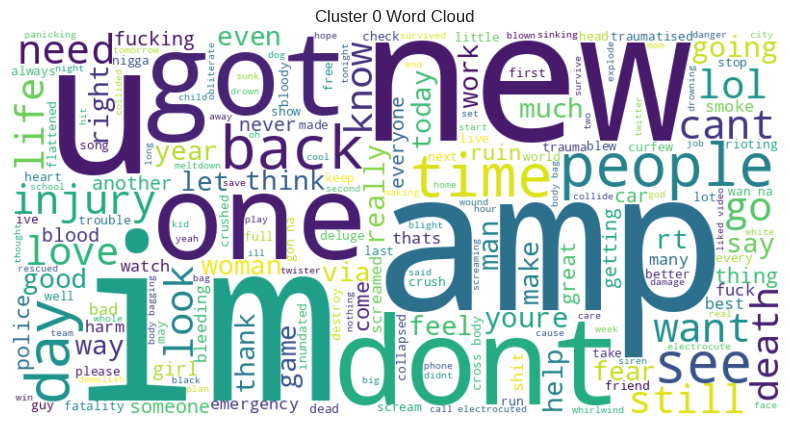

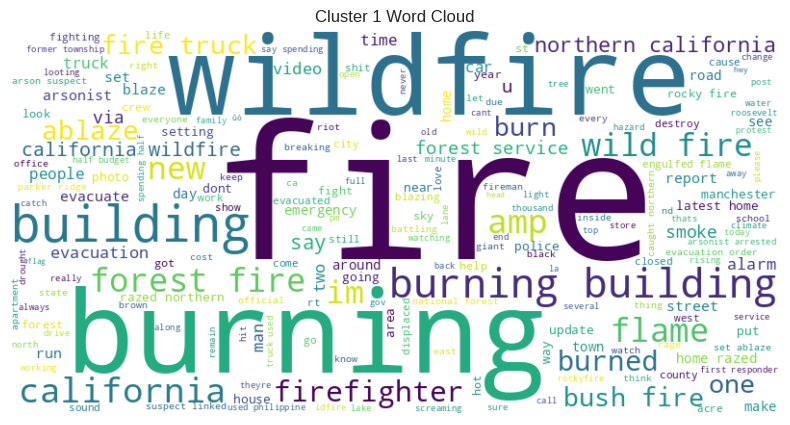

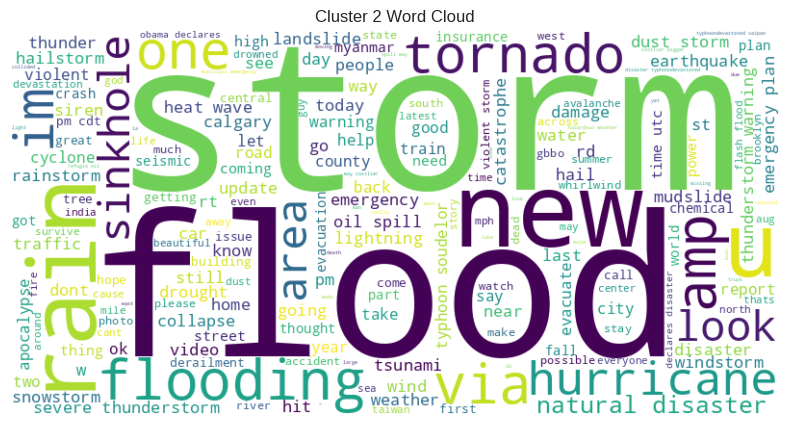

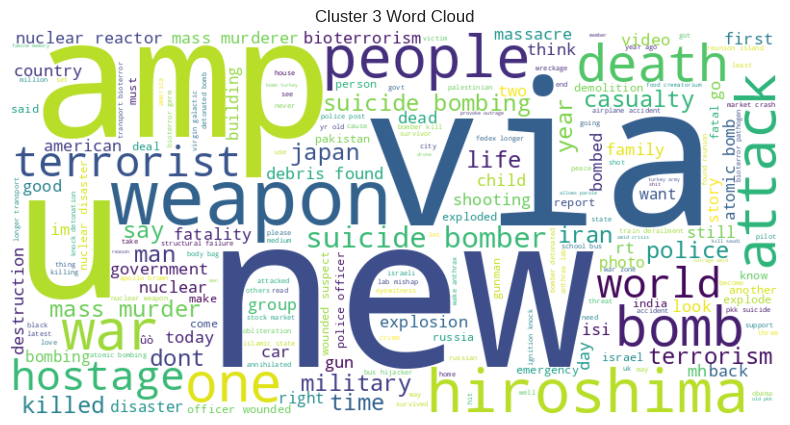

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Initialize the KMeans model
model = KMeans()

# Initialize the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(model, k=(2,10))

# Fit the visualizer to the embeddings
visualizer.fit(loaded_embeddings)
visualizer.show()


kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(loaded_embeddings)
subset_data.loc[:, 'cluster'] = clusters

for i in range(4):
    plt.figure(figsize=(10, 5))
    cluster_text = ' '.join(subset_data[subset_data['cluster'] == i]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(cluster_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud')
    plt.axis("off")
    plt.show()



In [ ]:

import numpy as np
for i in range(4):
  cluster_data = loaded_embeddings[clusters == i]
  sse = np.sum((cluster_data - kmeans.cluster_centers_[i])**2) / cluster_data.shape[0]
  print(f"Cluster {i}: SSE = {sse}")


Cluster 0: SSE = 0.2789598587660865
Cluster 1: SSE = 0.2086780565574443
Cluster 2: SSE = 0.23422060178849424
Cluster 3: SSE = 0.2628390142152833


In [ ]:

reindexed_subset_data = subset_data.reset_index(drop=True)


In [ ]:

cluster1_data = reindexed_subset_data[reindexed_subset_data['cluster'] == 1]
cluster1_data.head(5)


,id,keyword,location,text,target,clean_text,cluster
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed directi...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood,1


# Word Cloud after Kmeans clustering


In [ ]:

cluster1_embeddings = loaded_embeddings[cluster1_data.index]


In [ ]:
loaded_embeddings.shape

(6797, 768)

In [ ]:
subset_data.shape

(6797, 7)

In [ ]:
cluster1_data.index

Index([   1,    3,    4,    5,    7,   31,   33,   34,   35,   37,
       ...
       6578, 6579, 6580, 6582, 6583, 6584, 6585, 6586, 6587, 6787],
      dtype='int64', length=515)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

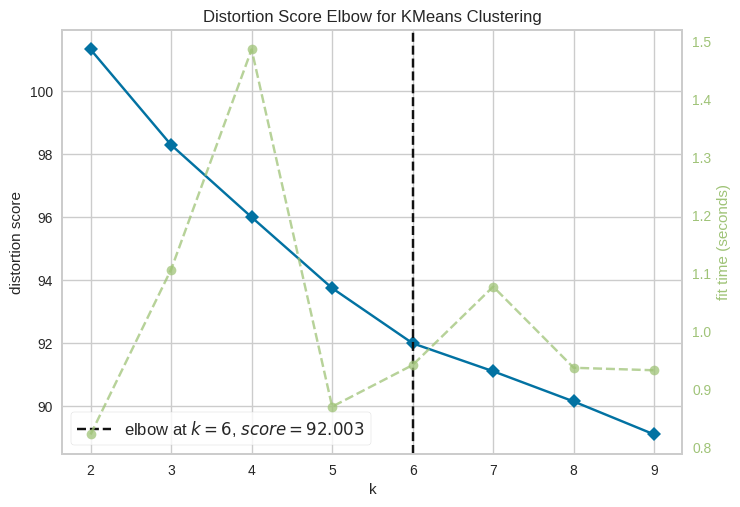

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-1df5689c200c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_data.loc[:, 'cluster1'] = clusters1


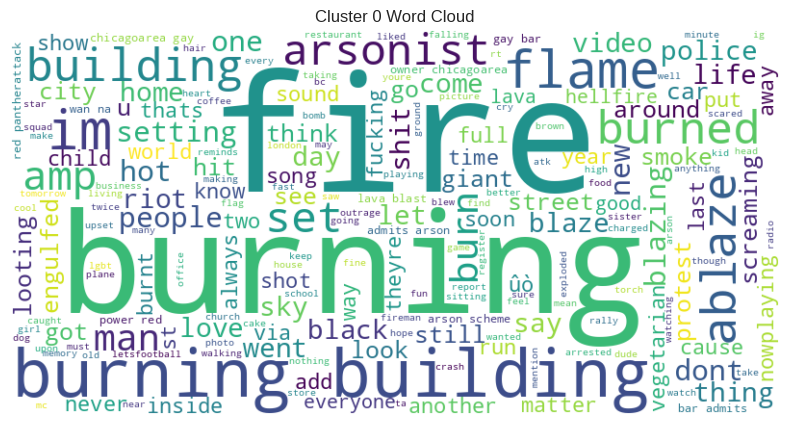

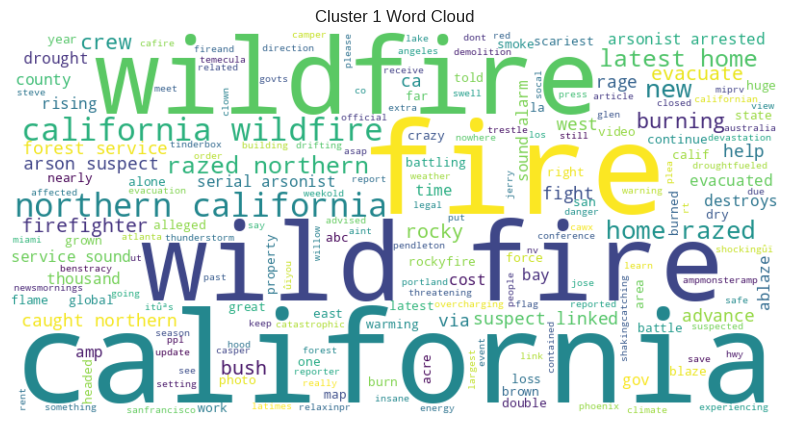

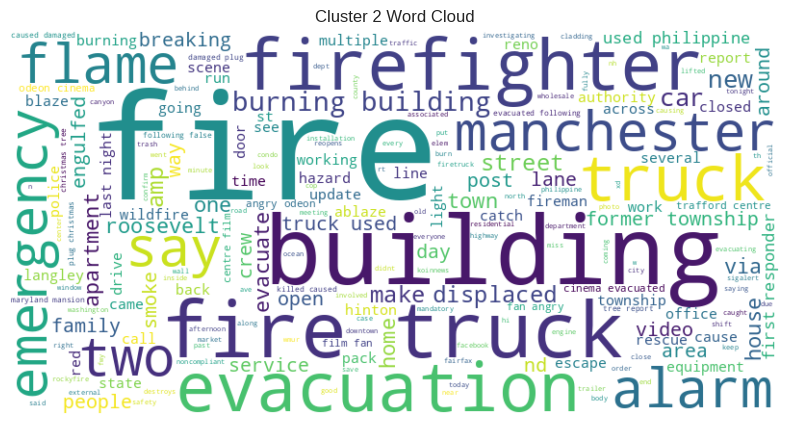

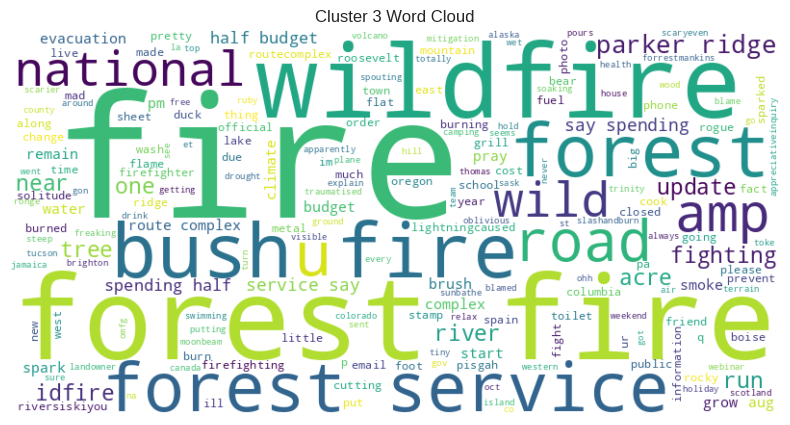

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Initialize the KMeans model
model = KMeans()

# Initialize the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(model, k=(2,10))

# Fit the visualizer to the embeddings
visualizer.fit(cluster1_embeddings)
visualizer.show()


kmeans = KMeans(n_clusters= 4, random_state=42)
clusters1 = kmeans.fit_predict(cluster1_embeddings)
cluster1_data.loc[:, 'cluster1'] = clusters1

for i in range(4):
    plt.figure(figsize=(10, 5))
    cluster_text = ' '.join(cluster1_data[cluster1_data['cluster1'] == i]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(cluster_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud')
    plt.axis("off")
    plt.show()


In [ ]:
import numpy as np
for i in range(4):
  cluster_data1 = cluster1_embeddings[clusters1 == i]
  sse1 = np.sum((cluster_data1 - kmeans.cluster_centers_[i])**2) / cluster_data1.shape[0]
  print(f"Cluster {i}: SSE = {sse1}")


Cluster 0: SSE = 0.21700284260612757
Cluster 1: SSE = 0.1282464949740472
Cluster 2: SSE = 0.18579497452107277
Cluster 3: SSE = 0.17133648544547334


In [ ]:


cluster1_data.head(10)


,id,keyword,location,text,target,clean_text,cluster,cluster1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,1,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,1,3
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed directi...,1,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood,1,3
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,wholesale market ablaze,1,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,1,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze,1,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,plus side look sky last night ablaze,1,2
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,inec office abia set ablaze,1,0


In [ ]:

# Create 5 dataframes for each subcluster in cluster1_data
cluster1_data_sub_cluster_0 = cluster1_data[cluster1_data['cluster1'] == 0]
cluster1_data_sub_cluster_1 = cluster1_data[cluster1_data['cluster1'] == 1]
cluster1_data_sub_cluster_2 = cluster1_data[cluster1_data['cluster1'] == 2]
cluster1_data_sub_cluster_3 = cluster1_data[cluster1_data['cluster1'] == 3]


In [ ]:
cluster1_data_sub_cluster_0.head(5)

,id,keyword,location,text,target,clean_text,cluster,cluster1
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,wholesale market ablaze,1,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,1,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,cry set ablaze,1,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,inec office abia set ablaze,1,0
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,barbados bridgetown jamaica ûò two car set abl...,1,0


The text primarily discusses various wildfire incidents and related activities across different locations, emphasizing firefighting efforts, evacuation orders, and the impact on communities and the environment. It also highlights resources and measures for wildfire mitigation and safety.


In [ ]:

# for i, row in cluster1_data_sub_cluster_0.iterrows():
#   print(row['text'])



The text mainly discusses various incidents of arson, including the intentional setting of fires to buildings, vehicles, and other properties across different locations. It highlights responses from emergency services, the impact on communities, and the arrest of suspects involved in these arson activities.

In [ ]:

# for i, row in cluster1_data_sub_cluster_1.iterrows():
#   print(row['text'])


The text discusses various instances of fires and arsons affecting buildings, vehicles, and natural areas. It mentions the involvement of emergency services, the consequences for communities, and specific arson cases where individuals or properties were targeted.

In [ ]:
# for i, row in cluster1_data_sub_cluster_2.iterrows():
#   print(row['text'])


The text generally discusses incidents involving fire emergencies, including vehicles like trucks and motorcycles being engulfed in flames, and responses by fire departments and emergency services. It also mentions evacuations and road closures due to these emergencies, highlighting the impact on traffic and public safety.

In [ ]:
# for i, row in cluster1_data_sub_cluster_3.iterrows():
#   print(row['text'])



The text discusses the severe wildfire situation in California, detailing evacuation orders, the closure of highways, and extensive property damage. It highlights the efforts to combat the fires, mentions arson arrests, and reflects on the broader implications of such frequent and intense wildfires in terms of climate change and resource allocation.

In [ ]:
# for i, row in cluster1_data_sub_cluster_4.iterrows():
#   print(row['text'])


In [ ]:

clustered_data = subset_data.loc[:, ['text', 'cluster']]
clustered_data.head(10)


,text,cluster
0,Our Deeds are the Reason of this #earthquake M...,3
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,2
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,2
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,2
9,I'm afraid that the tornado is coming to our a...,2


# Randomly selected tweet with what cluster it belongs to

In [ ]:

import random

# Get a random row index
random_index = random.randint(0, len(clustered_data) - 1)

# Get the tweet and cluster at the random index
tweet = clustered_data.loc[random_index, 'text']
cluster = clustered_data.loc[random_index, 'cluster']

# Display the tweet and cluster
print(f"Tweet: {tweet}")
print(f"Cluster: {cluster}")


Tweet: Live updates: Boyd gets out of trouble in 5th http://t.co/3ugfpwMY2x via @detroitnews
Cluster: 0


In [ ]:

cluster1_data.head(5)


,id,keyword,location,text,target,clean_text,cluster,cluster1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,1,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,1,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,1,3
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed directi...,1,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im top hill see fire wood,1,3


In [ ]:
import random

# Get the number of rows in cluster1_data
num_rows_cluster1 = len(cluster1_data)

# Check if there are rows in cluster1_data
if num_rows_cluster1 > 0:
    # Get a random row index for cluster1_data
    random_index = random.randint(0, num_rows_cluster1 - 1)

    # Get the tweet and cluster at the random index
    tweet = cluster1_data.iloc[random_index]['text']
    cluster = cluster1_data.iloc[random_index]['cluster1']

    # Display the tweet and cluster
    print(f"Random Tweet: {tweet}")
    print(f"Cluster: {cluster}")
else:
    print("No tweets found in Cluster 1.")


Random Tweet: This fire is WAY too close wtf is going on ???? http://t.co/drf3mmRbyx
Cluster: 2


# Top 5 similar tweets ranked with help of Euclidean Distance

In [ ]:

import numpy as np
def euclidean_distance(tweet1_embedding, tweet2_embedding):
  """
  Calculates the Euclidean distance between two tweet embeddings.

  Args:
    tweet1_embedding: A numpy array representing the embedding of the first tweet.
    tweet2_embedding: A numpy array representing the embedding of the second tweet.

  Returns:
    The Euclidean distance between the two tweet embeddings.
  """
  distance = np.linalg.norm(tweet1_embedding - tweet2_embedding)
  return distance

def find_similar_tweets(target_tweet_embedding, tweet_embeddings, top_k=5):
  """
  Finds the top k most similar tweets based on their embeddings.

  Args:
    target_tweet_embedding: A numpy array representing the embedding of the target tweet.
    tweet_embeddings: A numpy array containing the embeddings of all tweets.
    top_k: The number of similar tweets to return.

  Returns:
    A list of the indices of the top k most similar tweets.
  """
  distances = np.linalg.norm(tweet_embeddings - target_tweet_embedding, axis=1)
  sorted_indices = np.argsort(distances)
  return sorted_indices[1:top_k+1]

# Get the embedding of the target tweet
target_tweet_embedding = loaded_embeddings[554]

# Find the top 5 most similar tweets
similar_tweet_indices = find_similar_tweets(target_tweet_embedding, loaded_embeddings)

# Print the text of the similar tweets
for i in similar_tweet_indices:
  print(f"Similar Tweet: {subset_data.iloc[i]['text']}")



Similar Tweet: I See Fire
Similar Tweet: Fire burning on Pendleton has burned 300 acres: Smoke reported drifting over Temecula. http://t.co/ZR5RgbGh03
Similar Tweet: Large fire burning several buildings causing evacuations in downtown Hinton: http://t.co/mtMkiMwiyy
Similar Tweet: Smoke detectors not required in all buildings: An office building on Shevlin-Hixon Drive was on fire. There we... http://t.co/z6Ee1jVhNi
Similar Tweet: Wild land fires.. Here I come. ??????


In [ ]:
tweet_cluster_1 = subset_data[subset_data["cluster"] == 1]["clean_text"]
print(tweet_cluster_1)

1                   forest fire near la ronge sask canada
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
5       rockyfire update california hwy closed directi...
7                               im top hill see fire wood
                              ...                        
6584             oregon biggest wildfire slows growth via
6585    medium release firefighter ask hiker signin lo...
6586    latest wildfire destroys home crew advance wqo...
6587       california wildfire destroys home crew advance
6787    gas thing exploded heard scream whole street s...
Name: clean_text, Length: 515, dtype: object


In [ ]:
# prompt: i want a list of top 20 tweets from above without seperated by comma

top_20_tweets = tweet_cluster_1.head(20).tolist()
print(top_20_tweets)


['forest fire near la ronge sask canada', 'people receive wildfire evacuation order california', 'got sent photo ruby alaska smoke wildfire pours school', 'rockyfire update california hwy closed direction due lake county fire cafire wildfire', 'im top hill see fire wood', 'wholesale market ablaze', 'africanbaze breaking newsnigeria flag set ablaze aba', 'cry set ablaze', 'plus side look sky last night ablaze', 'inec office abia set ablaze', 'barbados bridgetown jamaica ûò two car set ablaze santa cruz ûó head st elizabeth police superintende', 'ablaze lord', 'outside youre ablaze alive youre dead inside', 'awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care u', 'soooo pumped ablaze', 'wanted set chicago ablaze preaching hotel', 'west thousand wildfire ablaze california alone', 'building perfect tracklist life leave street ablaze', 'deputy man shot brighton home set ablaze', 'man wife get six year jail setting ablaze niece']


In [ ]:

!pip install openai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!pip install tiktoken


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [ ]:
import os

open_api_key= "api"
os.environ["OPENAI_API_KEY"] = open_api_key

In [ ]:
# prompt: get all the tweets in cluster 1 in one variable - tweet_cluster_1

tweet_cluster_1 = subset_data[subset_data["cluster"] == 1]["clean_text"]
print(tweet_cluster_1)

1                   forest fire near la ronge sask canada
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
5       rockyfire update california hwy closed directi...
7                               im top hill see fire wood
                              ...                        
6584             oregon biggest wildfire slows growth via
6585    medium release firefighter ask hiker signin lo...
6586    latest wildfire destroys home crew advance wqo...
6587       california wildfire destroys home crew advance
6787    gas thing exploded heard scream whole street s...
Name: clean_text, Length: 515, dtype: object


In [ ]:
# prompt: convert tweet_cluster_1 into string

tweet_cluster_1 = " ".join(tweet_cluster_1.tolist())
print(tweet_cluster_1)

forest fire near la ronge sask canada people receive wildfire evacuation order california got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy closed direction due lake county fire cafire wildfire im top hill see fire wood wholesale market ablaze africanbaze breaking newsnigeria flag set ablaze aba cry set ablaze plus side look sky last night ablaze inec office abia set ablaze barbados bridgetown jamaica ûò two car set ablaze santa cruz ûó head st elizabeth police superintende ablaze lord outside youre ablaze alive youre dead inside awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care u soooo pumped ablaze wanted set chicago ablaze preaching hotel west thousand wildfire ablaze california alone building perfect tracklist life leave street ablaze deputy man shot brighton home set ablaze man wife get six year jail setting ablaze niece police arsonist deliberately set black church north carolinaåêablaze truck ablaze r voortr

In [ ]:
speech = """forest fire near la ronge sask canada people receive wildfire evacuation order california got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy closed direction due lake county fire cafire wildfire im top hill see fire wood wholesale market ablaze africanbaze breaking newsnigeria flag set ablaze aba cry set ablaze plus side look sky last night ablaze inec office abia set ablaze barbados bridgetown jamaica ûò two car set ablaze santa cruz ûó head st elizabeth police superintende ablaze lord outside youre ablaze alive youre dead inside awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care u soooo pumped ablaze wanted set chicago ablaze preaching hotel west thousand wildfire ablaze california alone building perfect tracklist life leave street ablaze deputy man shot brighton home set ablaze man wife get six year jail setting ablaze niece police arsonist deliberately set black church north carolinaåêablaze truck ablaze r voortrekker ave outside tambo intl cargo section set heart ablaze every city gift every skyline like kiss upon lip sky ablaze tonight los angeles im expecting ig fb filled sunset shot know peep west thousand wildfire ablaze california alone climate energy progressive greeting month student would set pen ablaze torch publication rene ablaze amp jacinta secret k fallen sky edit mar steve fire something else california tinderbox clown setting hood ablaze huge fire wholesale market ablaze spokane authority say theyre struggling solve arson case like today hamilton add"""

In [ ]:
## Basic Prompt Summarization
from langchain.chat_models import ChatOpenAI
from langchain.schema import(
    AIMessage,
    HumanMessage,
    SystemMessage
)


chat_messages=[
    SystemMessage(content='You are an expert assistant with expertize in summarizing speeches'),
    HumanMessage(content=f'Please provide a short and concise summary of the following speech:\n TEXT: {speech}')
]

llm=ChatOpenAI(model_name='gpt-3.5-turbo')




/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


The speech discusses multiple instances of wildfires and arson cases in various locations, including Canada, California, Alaska, Nigeria, Jamaica, and other places. It also mentions instances of buildings and vehicles being set ablaze intentionally. The speaker expresses concern about the increasing number of fires and the challenges faced by authorities in solving arson cases.


In [ ]:
llm.get_num_tokens(speech)


316

In [ ]:
print(llm(chat_messages).content)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

# Assuming `subset_data` is a DataFrame and has been defined elsewhere in your code.
tweet_cluster_1 = subset_data[subset_data["cluster"] == 1]["text"].tolist()

# Convert the list of tweets into a single string, separating tweets by new lines.
tweets_text = "\n".join(tweet_cluster_1)

# Instantiate the language model from LangChain with the specific model name.
llm = ChatOpenAI(model_name='gpt-3.5-turbo')

# Create a system message instructing the model on what it is expected to do.
system_message = SystemMessage(content='You are an expert with understanding what the tweets say, and summarize them.')

# Create a human message requesting the model to summarize the tweets.
human_message = HumanMessage(content=f'Please provide a short and concise 30-40 words summary of the following tweets: \n TWEETS: {tweets_text}')

# Assuming you need to send these messages to the model and get a response.
# If there's no `generate_response` method, you might need to use `chat` or another equivalent method:
try:
    # Try using a chat method if it's available.
    response = llm.chat(human_message.content)
    print("Summary:", response.content)
except AttributeError:
    # If the chat method doesn't exist, print an error message.
    print("The method used is incorrect. Please check the LangChain documentation for the correct method to interact with the model.")

# To check the number of tokens in the `tweets_text`:
num_tokens = llm.get_num_tokens(tweets_text)
print("Number of tokens in the tweets:", num_tokens)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


The method used is incorrect. Please check the LangChain documentation for the correct method to interact with the model.
Number of tokens in the tweets: 14944
